In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import pickle


import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('Train-dataset.csv')

In [31]:
display(df.info())
display(df.head(5))
display(df.tail(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45749 entries, 0 to 45748
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL                      45749 non-null  object 
 1   X                         45749 non-null  float64
 2   Y                         45749 non-null  float64
 3   MD                        45749 non-null  float64
 4   GR                        45749 non-null  float64
 5   RT                        45749 non-null  float64
 6   CN                        45749 non-null  float64
 7   DEN                       45749 non-null  float64
 8   DEPOSITIONAL_ENVIRONMENT  45749 non-null  object 
 9   LITH_NAME                 45749 non-null  object 
 10  LITH_CODE                 45749 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 3.8+ MB


None

,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
0,Well-1,0.8179,2.9814,1602.0,83.939,3.166,0.250,2.344,Marine,Marly sandstone,1200
1,Well-1,0.8179,2.9814,1602.1,84.166,3.135,0.246,2.352,Marine,Marly sandstone,1200
2,Well-1,0.8179,2.9814,1602.2,85.055,3.089,0.244,2.352,Marine,Marly sandstone,1200
3,Well-1,0.8179,2.9814,1602.3,86.352,3.042,0.242,2.355,Marine,Sandy marl,1300
4,Well-1,0.8179,2.9814,1602.4,87.614,3.003,0.241,2.369,Marine,Sandy marl,1300


,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
45744,Well-10,3.0,0.0,2275.2,103.6016,1.0789,0.29558,2.3783,Marine,Clay marl,400
45745,Well-10,3.0,0.0,2275.3,102.8472,1.0683,0.29264,2.3651,Marine,Clay marl,400
45746,Well-10,3.0,0.0,2275.4,102.5699,1.0790,0.29425,2.3531,Marine,Clay marl,400
45747,Well-10,3.0,0.0,2275.5,102.7901,1.1045,0.30096,2.3430,Marine,Clay marl,400
45748,Well-10,3.0,0.0,2275.6,103.5419,1.1360,0.31172,2.3361,Marine,Clay marl,400


In [32]:
df

,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
0,Well-1,0.8179,2.9814,1602.0,83.9390,3.1660,0.25000,2.3440,Marine,Marly sandstone,1200
1,Well-1,0.8179,2.9814,1602.1,84.1660,3.1350,0.24600,2.3520,Marine,Marly sandstone,1200
2,Well-1,0.8179,2.9814,1602.2,85.0550,3.0890,0.24400,2.3520,Marine,Marly sandstone,1200
3,Well-1,0.8179,2.9814,1602.3,86.3520,3.0420,0.24200,2.3550,Marine,Sandy marl,1300
4,Well-1,0.8179,2.9814,1602.4,87.6140,3.0030,0.24100,2.3690,Marine,Sandy marl,1300
...,...,...,...,...,...,...,...,...,...,...,...
45744,Well-10,3.0000,0.0000,2275.2,103.6016,1.0789,0.29558,2.3783,Marine,Clay marl,400
45745,Well-10,3.0000,0.0000,2275.3,102.8472,1.0683,0.29264,2.3651,Marine,Clay marl,400
45746,Well-10,3.0000,0.0000,2275.4,102.5699,1.0790,0.29425,2.3531,Marine,Clay marl,400
45747,Well-10,3.0000,0.0000,2275.5,102.7901,1.1045,0.30096,2.3430,Marine,Clay marl,400


In [33]:
wells = df['WELL'].unique()
print(wells)

['Well-1' 'Well-9' 'Well-4' 'Well-2' 'Well-3' 'Well-8' 'Well-5' 'Well-6'
 'Well-11' 'Well-7' 'Well-10']


(1810.0, 697.6)

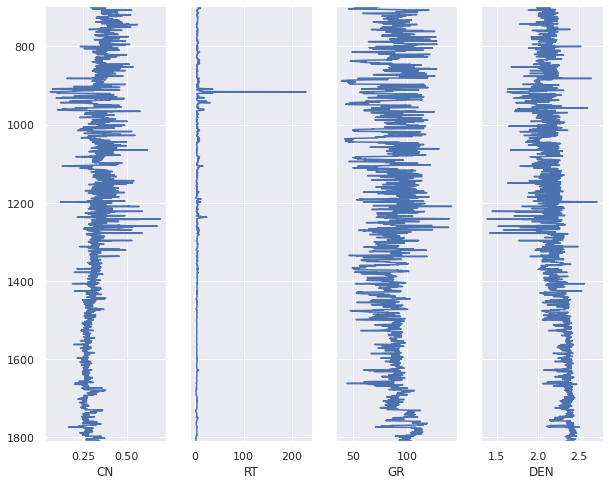

In [34]:
#see how well logging curves look by depth parameter (MD) for different wells
well_data = df[df['WELL'] == wells[8]]

fig, axs = plt.subplots(1, len(well_data.columns)-7, figsize=(10, 8), sharey=True)
for ic, col in enumerate(set(well_data.columns)-set(['WELL',
                                                     'MD',
                                                     'DEPOSITIONAL_ENVIRONMENT',
                                                     'LITH_NAME',
                                                     'LITH_CODE',
                                                      'X',
                                                      'Y'])):
    axs[ic].plot(well_data[col], well_data['MD'])
    axs[ic].set_xlabel(col)
    
axs[0].set_ylim(well_data['MD'].values[-1], well_data['MD'].values[0])

In [35]:
df['LITH_NAME'].value_counts()

Sandstone          11572
Clay marl           8054
Clay                7716
Clay sandstone      6496
Sandy marl          5677
Coal                2547
Marl                1236
Marly sandstone      889
Tight                693
Coal clay            443
Siltstone clay       340
Marl clay             83
Siltstone/Loess        3
Name: LITH_NAME, dtype: int64

In [36]:
lithology_color = {100: '#997950',
                    200: '#cccccc',
                    300: '#ffff00',
                    400: '#ffccff',
                    500: '#006600',
                    600: '#666600',
                    700: '#F8DE7E',
                    800: '#999DA0',
                    900: '#9933ff',
                    1000: '#ff6600',
                    1100: '#000000',
                    1200: '#98FB98',
                    1300: '#ff9999',
                    1400: '#CEB180',
                    1500: '#3BB143'
                    }

lithology_key = {100: 'Clay',
                 200: 'Siltstone/Loess',
                 300: 'Marl',
                 400: 'Clay marl',
                 500: 'Clay sandstone',
                 600: 'Sandstone',
                 700: 'Limestone',
                 800: 'Tight',
                 900: 'Dolomite',
                 1000: 'Coal',
                 1100: 'Coal clay',
                 1200: 'Marly sandstone',
                 1300: 'Sandy marl',
                 1400: 'Marl clay',
                 1500: 'Siltstone clay'
                  }

In [37]:
def autolabel(ax, bars, labels):
    """Attach a text label above each bar."""
    for bar, label in zip(bars, labels):
        height = bar.get_height()
        ax.annotate('{}'.format(label),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

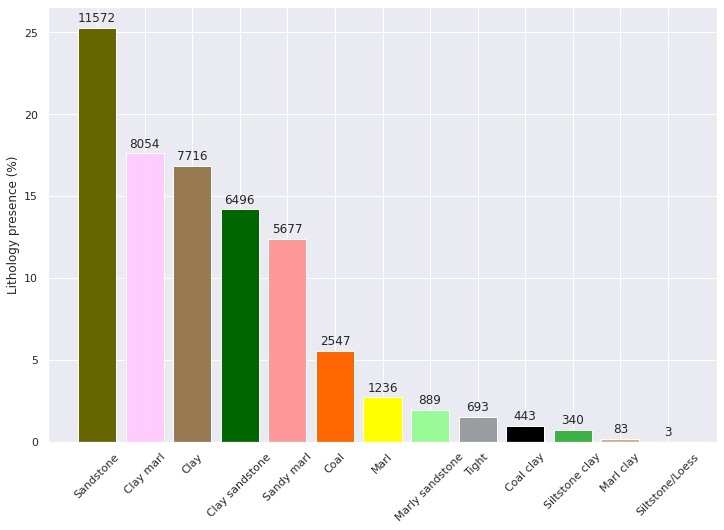

In [38]:
counts = df['LITH_CODE'].value_counts()
names = []
percentage = []
numbers = []
colors = []
N = df['LITH_CODE'].shape[0]
for item in counts.iteritems():
    names.append(lithology_key[item[0]])
    percentage.append(float(item[1]) / N*100)
    numbers.append(int(item[1]))
    colors.append(lithology_color[item[0]])
    
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
bar = ax.bar(x=np.arange(len(names)), height=percentage, color=colors)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (%)')

autolabel(ax, bar, numbers)

In [39]:
MAPPING = {
    'Continental': 1,
    'Transitional': 2,
    'Marine': 3,
}

df['D_Env']=df['DEPOSITIONAL_ENVIRONMENT'].apply(lambda x: MAPPING[x])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45749 entries, 0 to 45748
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   WELL                      45749 non-null  object 
 1   X                         45749 non-null  float64
 2   Y                         45749 non-null  float64
 3   MD                        45749 non-null  float64
 4   GR                        45749 non-null  float64
 5   RT                        45749 non-null  float64
 6   CN                        45749 non-null  float64
 7   DEN                       45749 non-null  float64
 8   DEPOSITIONAL_ENVIRONMENT  45749 non-null  object 
 9   LITH_NAME                 45749 non-null  object 
 10  LITH_CODE                 45749 non-null  int64  
 11  D_Env                     45749 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 4.2+ MB


In [40]:
Feature = df[['MD','GR', 'RT', 'DEN', 'CN', 'X', 'Y']]

In [41]:
X = Feature
X = preprocessing.StandardScaler().fit(X).transform(X)

In [42]:
y = df['LITH_CODE']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (36599, 7) (36599,)
Test set: (9150, 7) (9150,)


In [44]:
def show_conf_matrix(y_test, y_pred, classes):
    
    # Calculate confusion matrix
    conf = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(12,12))
    sns.set(font_scale=1)
    sns.heatmap(conf, annot=True, annot_kws={"size": 16}, fmt="d", linewidths=.5, cmap="YlGnBu", xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted value')
    plt.ylabel('True value')
    
    plt.show()

In [45]:
target_lithologys = []
labels = np.sort(y_test.unique())

for l_code in labels:
    lithology = lithology_key[l_code]
    target_lithologys.append(lithology)

print(labels)
print(target_lithologys)

[ 100  300  400  500  600  800 1000 1100 1200 1300 1400 1500]
['Clay', 'Marl', 'Clay marl', 'Clay sandstone', 'Sandstone', 'Tight', 'Coal', 'Coal clay', 'Marly sandstone', 'Sandy marl', 'Marl clay', 'Siltstone clay']


In [46]:
#fitting the K parameter

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):

    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


In [47]:
#Random forest
rf_classifier = RandomForestClassifier(n_estimators=10, max_leaf_nodes=10,min_samples_split=10, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

         100       0.68      0.96      0.80      1546
         300       0.00      0.00      0.00       249
         400       0.71      0.98      0.82      1615
         500       0.76      0.96      0.85      1251
         600       0.85      0.83      0.84      2305
         800       0.00      0.00      0.00       143
        1000       0.77      0.02      0.04       493
        1100       0.00      0.00      0.00        98
        1200       0.00      0.00      0.00       205
        1300       0.67      0.52      0.58      1156
        1400       0.00      0.00      0.00        17
        1500       0.00      0.00      0.00        72

    accuracy                           0.74      9150
   macro avg       0.37      0.36      0.33      9150
weighted avg       0.69      0.74      0.68      9150



In [48]:
#SVM

niz = []
for i in range(10):
    lsvc_model = LinearSVC(C=i+1, loss='hinge')
    lsvc_model.fit(X_train, y_train)
    linear_svc_predictions = lsvc_model.predict(X_test)
    niz.append(metrics.accuracy_score(y_test, linear_svc_predictions))


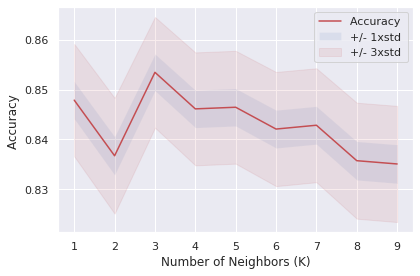

The highest accuracy 0.85 was obtained with k= 3 .


In [49]:
plt.plot(range(1,Ks), mean_acc, 'r')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color='r')
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The highest accuracy", round((mean_acc.max()),2), "was obtained with k=",mean_acc.argmax()+1,"." ) 

Train set accuracy:  0.93
Test set accuracy:  0.85


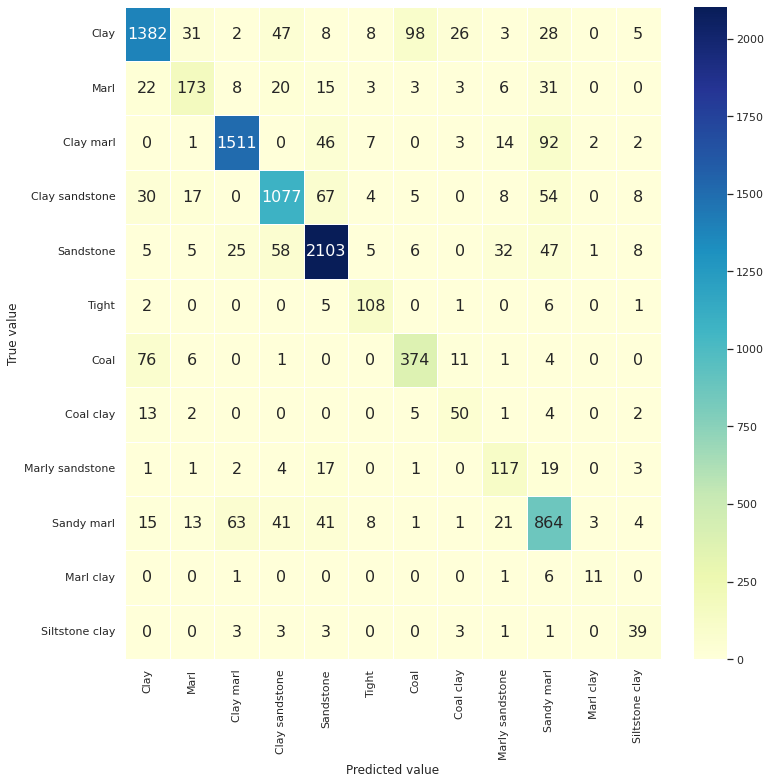

Test set classification report
----------------------------------------------------------------------------------
                 precision    recall  f1-score   support

           Clay       0.84      0.89      0.87      1546
           Marl       0.61      0.69      0.65       249
      Clay marl       0.90      0.94      0.92      1615
 Clay sandstone       0.85      0.86      0.85      1251
      Sandstone       0.92      0.91      0.91      2305
          Tight       0.88      0.76      0.81       143
           Coal       0.79      0.76      0.77       493
      Coal clay       0.65      0.51      0.57        98
Marly sandstone       0.71      0.57      0.63       205
     Sandy marl       0.80      0.75      0.77      1156
      Marl clay       0.58      0.65      0.61        17
 Siltstone clay       0.74      0.54      0.62        72

       accuracy                           0.85      9150
      macro avg       0.77      0.74      0.75      9150
   weighted avg       0.85   

In [50]:
model = KNeighborsClassifier(n_neighbors = 3).fit(X_train,y_train)

y_predict = model.predict(X_test)

print("Train set accuracy: ", round(metrics.f1_score(y_train, model.predict(X_train), average = 'micro'), 2))
print("Test set accuracy: ", round(metrics.f1_score(y_test, y_predict, average = 'micro'), 2))

show_conf_matrix(y_predict, y_test, target_lithologys)

print('==================================================================================')
print('Test set classification report')
print('----------------------------------------------------------------------------------')
print(classification_report(y_test, y_predict, labels=labels, target_names=target_lithologys, zero_division=0))
print('==================================================================================')